In [1]:
#!pip install lightgbm
#!pip install xgboost

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("/kaggle/input/model-data/model_data.csv")
data.head()

,SK_ID_CURR,CNT_CHILDREN,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_INCOME_TOTAL,AMT_CREDIT,...,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,TARGET
0,0.000000,0.0,1.0,0.5,0.5,0.434783,0.0,1.0,0.001512,0.090287,...,0,0,0,0,0,0,0,1,0,1
1,0.000003,0.0,1.0,0.0,0.0,0.478261,0.0,1.0,0.002089,0.311736,...,0,0,1,0,0,0,0,0,0,0
2,0.000006,0.0,1.0,0.5,0.5,0.391304,0.0,0.0,0.000358,0.022472,...,0,0,0,0,0,0,1,0,0,0
3,0.000011,0.0,0.0,0.5,0.5,0.739130,0.0,1.0,0.000935,0.066837,...,0,0,0,0,0,0,1,0,0,0
4,0.000014,0.0,0.0,0.5,0.5,0.478261,1.0,0.0,0.000819,0.116854,...,0,0,0,0,0,0,1,0,0,0


In [4]:
features=data.drop("TARGET",axis=1)
y=data["TARGET"]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=42)
x_train.head()

,SK_ID_CURR,CNT_CHILDREN,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_INCOME_TOTAL,AMT_CREDIT,...,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
123473,0.401931,0.000000,0.0,0.5,0.5,0.391304,0.0,1.0,0.001243,0.127409,...,0,0,1,0,0,0,0,1,0,0
10118,0.033055,0.052632,1.0,0.5,0.5,0.304348,0.0,1.0,0.001127,0.038224,...,0,0,0,0,0,0,0,0,1,0
64716,0.210679,0.000000,0.0,0.5,0.5,0.565217,0.0,0.0,0.000935,0.182598,...,0,0,0,0,0,0,0,1,0,0
234940,0.763909,0.052632,1.0,0.5,0.5,0.434783,1.0,0.0,0.001184,0.213483,...,0,0,0,0,0,0,0,1,0,0
236051,0.767460,0.000000,0.0,0.5,0.5,0.521739,0.0,1.0,0.001704,0.122015,...,0,0,0,0,0,0,0,1,0,0


In [6]:
y_train.head()

123473    0
10118     0
64716     1
234940    0
236051    0
Name: TARGET, dtype: int64

In [7]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


In [8]:
models = {
    "XGBClassifier": XGBClassifier(tree_method="gpu_hist" if device == "cuda" else "hist", use_label_encoder=False, verbosity=0),
    "RandomForestClassifier": RandomForestClassifier(class_weight="balanced"),
    "DecisionTreeClassifier": DecisionTreeClassifier(class_weight="balanced"),  

}

Training model: XGBClassifier
Train Score for XGBClassifier: 0.982061558973692
Test Score for XGBClassifier: 0.9757247613937532
Training model: RandomForestClassifier
Train Score for RandomForestClassifier: 0.9999959350915417
Test Score for RandomForestClassifier: 0.950018698274881
Training model: DecisionTreeClassifier
Train Score for DecisionTreeClassifier: 1.0
Test Score for DecisionTreeClassifier: 0.955254215241533
Evaluating XGBClassifier
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56554
           1       0.97      0.72      0.83      4949

    accuracy                           0.98     61503
   macro avg       0.97      0.86      0.91     61503
weighted avg       0.98      0.98      0.97     61503

Confusion Matrix for XGBClassifier:
[[56427   127]
 [ 1366  3583]]
ROC-AUC for XGBClassifier: 0.98
Evaluating RandomForestClassifier
Classification Report for RandomForestClassifier:
 

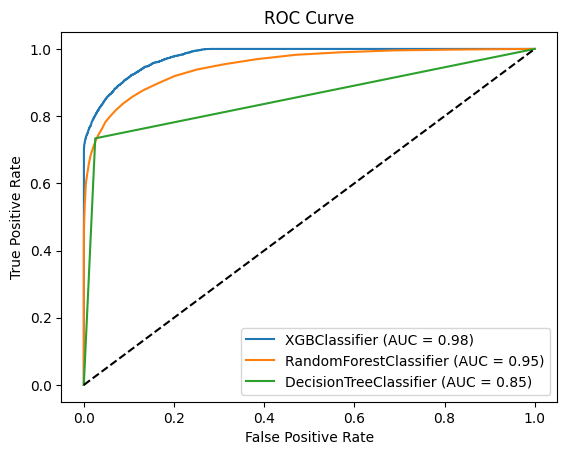

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

trained_models = {}
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(x_train, y_train)  
    trained_models[name] = model
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"Train Score for {name}: {train_score}")
    print(f"Test Score for {name}: {test_score}")

for name, model in trained_models.items():
    print(f"Evaluating {name}")
    
    # Predict
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC for {name}: {roc_auc:.2f}")
        
        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    else:
        print(f"{name} does not support probability estimates. Skipping ROC-AUC.")

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [10]:
x_train.columns = x_train.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)


[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19631
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 223
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56554
           1       0.98      0.71      0.83      4949

    accuracy                           0.98     61503
   macro avg       0.98      0.86      0.91     61503
weighted avg       0.98      0.98      0.97     61503

Confusion Matrix:
[[56482    72]
 [ 1411  3538]]
ROC-AUC: 0.98


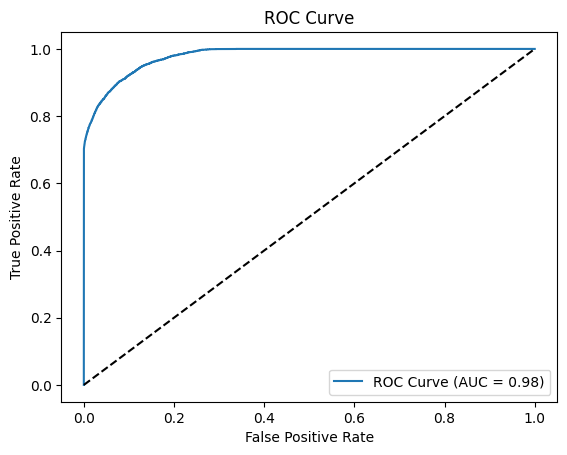

In [11]:
LGBMClassifier=lgb.LGBMClassifier()

LGBMClassifier.fit(x_train,y_train)

y_pred = LGBMClassifier.predict(x_test)

y_proba = LGBMClassifier.predict_proba(x_test)[:, 1]  

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [12]:
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

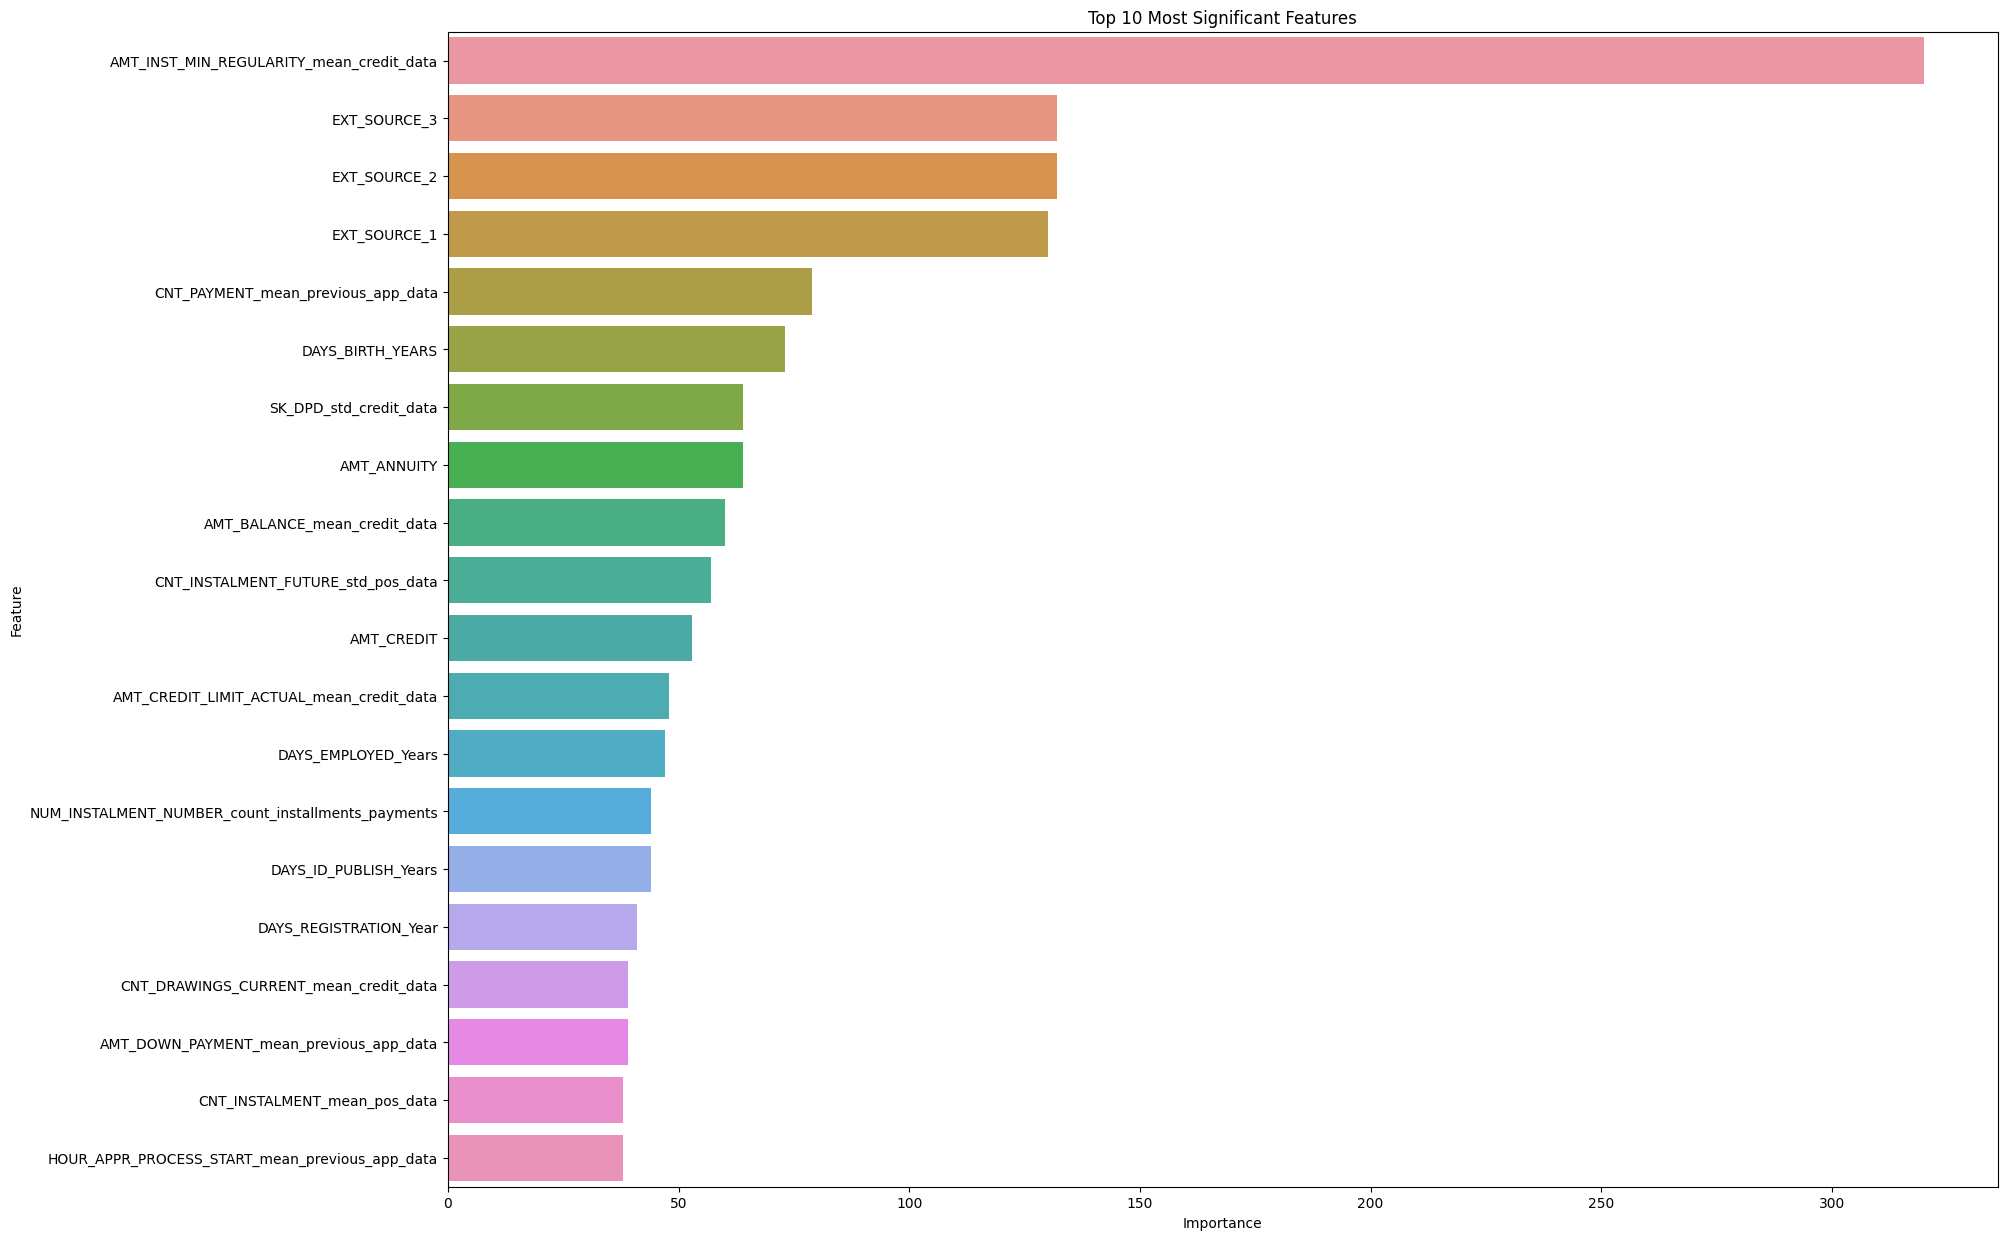

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming xg is your trained XGBClassifier and x_train is a DataFrame
feature_names = x_train.columns  # Feature names from the dataset

# Get feature importances from XGBClassifier
feature_importances = LGBMClassifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 10 most significant features
plt.figure(figsize=(20, 15))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance
)
plt.title('Top 10 Most Significant Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
